<a href="https://colab.research.google.com/github/mthbrito/Grafos_Coloracao_de_mapas_algoritmo_Welsh_Powell/blob/main/Grafos_Colora%C3%A7%C3%A3o_de_mapas_com_o_algoritmo_Welsh_Powell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Biblioteca utilizadas**

In [ ]:
import pandas as pd
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
import folium
from folium.plugins import Search
import json
import numpy as np

### **Arquivo de entrada**

In [ ]:
gdf = gpd.read_file('/content/drive/MyDrive/Africa_Countries/Africa_Countries.shp')
gdf

,OBJECTID,FIPS_CNTRY,ISO_2DIGIT,ISO_3DIGIT,NAME,COUNTRYAFF,CONTINENT,TOTPOP,geometry
0,2,UV,BF,BFA,Burkina Faso,Burkina Faso,Africa,20107509,"POLYGON ((102188.311 1231698.57, 90385.321 123..."
1,3,CV,CV,CPV,Cabo Verde,Cabo Verde,Africa,560899,"MULTIPOLYGON (((-2618884.175 1677229.988, -263..."
2,4,IV,CI,CIV,Côte d'Ivoire,Côte d'Ivoire,Africa,24184810,"MULTIPOLYGON (((-594413.663 579405.6, -592194...."
3,5,GA,GM,GMB,Gambia,Gambia,Africa,2051363,"POLYGON ((-1848987.432 1513709.133, -1846806.6..."
4,6,GH,GH,GHA,Ghana,Ghana,Africa,27499924,"POLYGON ((-352664.242 697837.25, -352573.081 6..."
5,7,GV,GN,GIN,Guinea,Guinea,Africa,12413867,"POLYGON ((-884637.819 895544.47, -892658.856 8..."
6,8,PU,GW,GNB,Guinea-Bissau,Guinea-Bissau,Africa,1792338,"MULTIPOLYGON (((-1745675.846 1322712.622, -175..."
7,9,LI,LR,LBR,Liberia,Liberia,Africa,4689021,"POLYGON ((-1279319.968 773005.717, -1276371.11..."
8,10,ML,ML,MLI,Mali,Mali,Africa,17885245,"POLYGON ((-1098191.027 1351946.666, -1103392.7..."
9,11,MR,MR,MRT,Mauritania,Mauritania,Africa,3758571,"MULTIPOLYGON (((-1192943.178 1739834.275, -119..."


# **Preparação do Grafo**

### **Seleção dos dados**

In [ ]:
gdf = gdf[['NAME', 'geometry']]
gdf

,NAME,geometry
0,Burkina Faso,"POLYGON ((102188.311 1231698.57, 90385.321 123..."
1,Cabo Verde,"MULTIPOLYGON (((-2618884.175 1677229.988, -263..."
2,Côte d'Ivoire,"MULTIPOLYGON (((-594413.663 579405.6, -592194...."
3,Gambia,"POLYGON ((-1848987.432 1513709.133, -1846806.6..."
4,Ghana,"POLYGON ((-352664.242 697837.25, -352573.081 6..."
5,Guinea,"POLYGON ((-884637.819 895544.47, -892658.856 8..."
6,Guinea-Bissau,"MULTIPOLYGON (((-1745675.846 1322712.622, -175..."
7,Liberia,"POLYGON ((-1279319.968 773005.717, -1276371.11..."
8,Mali,"POLYGON ((-1098191.027 1351946.666, -1103392.7..."
9,Mauritania,"MULTIPOLYGON (((-1192943.178 1739834.275, -119..."


<Axes: >

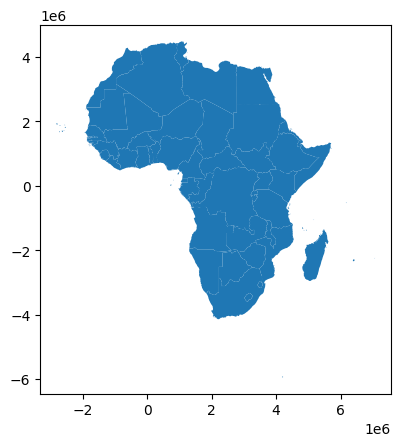

In [ ]:
gdf.plot()

### **Obtenção dos países fronteiriços de cada geometria**



In [ ]:
def get_paises_vizinhos(gdf):
  paises = {}
  for i in range(len(gdf)):
    vizinhos = []
    pais = gdf.loc[i, :]
    for j in range(len(gdf)):
      pais_vizinho = gdf.loc[j, :]
      if (pais['geometry'].intersects(pais_vizinho['geometry']) and (pais['geometry'] != pais_vizinho['geometry'])):
        vizinhos.append(pais_vizinho['NAME'])
    paises[pais['NAME']] = vizinhos
  return paises

In [ ]:
paises = get_paises_vizinhos(gdf)
paises

{'Burkina Faso': ["Côte d'Ivoire", 'Ghana', 'Mali', 'Benin', 'Niger', 'Togo'],
 'Cabo Verde': [],
 "Côte d'Ivoire": ['Burkina Faso', 'Ghana', 'Guinea', 'Liberia', 'Mali'],
 'Gambia': ['Senegal'],
 'Ghana': ['Burkina Faso', "Côte d'Ivoire", 'Togo'],
 'Guinea': ["Côte d'Ivoire",
  'Guinea-Bissau',
  'Liberia',
  'Mali',
  'Senegal',
  'Sierra Leone'],
 'Guinea-Bissau': ['Guinea', 'Senegal'],
 'Liberia': ["Côte d'Ivoire", 'Guinea', 'Sierra Leone'],
 'Mali': ['Burkina Faso',
  "Côte d'Ivoire",
  'Guinea',
  'Mauritania',
  'Senegal',
  'Algeria',
  'Niger'],
 'Mauritania': ['Mali', 'Morocco', 'Senegal', 'Algeria'],
 'Morocco': ['Mauritania', 'Algeria'],
 'Senegal': ['Gambia', 'Guinea', 'Guinea-Bissau', 'Mali', 'Mauritania'],
 'Sierra Leone': ['Guinea', 'Liberia'],
 'Angola': ['Congo', 'Congo DRC', 'Namibia', 'Zambia'],
 'Botswana': ['Namibia', 'South Africa', 'Zambia', 'Zimbabwe'],
 'Burundi': ['Congo DRC', 'Rwanda', 'Tanzania'],
 'Comoros': [],
 'Congo': ['Angola',
  'Congo DRC',
  'Gabon

### **Visualização dos países e seus respectivos vizinhos**

In [ ]:
for i, j in paises.items():
  print(i.ljust(20, ' '), " | ".join(j))

Burkina Faso         Côte d'Ivoire | Ghana | Mali | Benin | Niger | Togo
Cabo Verde           
Côte d'Ivoire        Burkina Faso | Ghana | Guinea | Liberia | Mali
Gambia               Senegal
Ghana                Burkina Faso | Côte d'Ivoire | Togo
Guinea               Côte d'Ivoire | Guinea-Bissau | Liberia | Mali | Senegal | Sierra Leone
Guinea-Bissau        Guinea | Senegal
Liberia              Côte d'Ivoire | Guinea | Sierra Leone
Mali                 Burkina Faso | Côte d'Ivoire | Guinea | Mauritania | Senegal | Algeria | Niger
Mauritania           Mali | Morocco | Senegal | Algeria
Morocco              Mauritania | Algeria
Senegal              Gambia | Guinea | Guinea-Bissau | Mali | Mauritania
Sierra Leone         Guinea | Liberia
Angola               Congo | Congo DRC | Namibia | Zambia
Botswana             Namibia | South Africa | Zambia | Zimbabwe
Burundi              Congo DRC | Rwanda | Tanzania
Comoros              
Congo                Angola | Congo DRC | Gabon | Cameroo

In [ ]:
df = pd.DataFrame(paises.items(), columns=['pais', 'vizinhos'])
df

,pais,vizinhos
0,Burkina Faso,"[Côte d'Ivoire, Ghana, Mali, Benin, Niger, Togo]"
1,Cabo Verde,[]
2,Côte d'Ivoire,"[Burkina Faso, Ghana, Guinea, Liberia, Mali]"
3,Gambia,[Senegal]
4,Ghana,"[Burkina Faso, Côte d'Ivoire, Togo]"
5,Guinea,"[Côte d'Ivoire, Guinea-Bissau, Liberia, Mali, ..."
6,Guinea-Bissau,"[Guinea, Senegal]"
7,Liberia,"[Côte d'Ivoire, Guinea, Sierra Leone]"
8,Mali,"[Burkina Faso, Côte d'Ivoire, Guinea, Mauritan..."
9,Mauritania,"[Mali, Morocco, Senegal, Algeria]"


### **União do dataframe original ao dataframe com as geometrias vizinhas**

In [ ]:
df = pd.merge(df, gdf, left_on='pais', right_on='NAME')
df.drop('NAME', axis=1, inplace=True)
df

,pais,vizinhos,geometry
0,Burkina Faso,"[Côte d'Ivoire, Ghana, Mali, Benin, Niger, Togo]","POLYGON ((102188.311 1231698.57, 90385.321 123..."
1,Cabo Verde,[],"MULTIPOLYGON (((-2618884.175 1677229.988, -263..."
2,Côte d'Ivoire,"[Burkina Faso, Ghana, Guinea, Liberia, Mali]","MULTIPOLYGON (((-594413.663 579405.6, -592194...."
3,Gambia,[Senegal],"POLYGON ((-1848987.432 1513709.133, -1846806.6..."
4,Ghana,"[Burkina Faso, Côte d'Ivoire, Togo]","POLYGON ((-352664.242 697837.25, -352573.081 6..."
5,Guinea,"[Côte d'Ivoire, Guinea-Bissau, Liberia, Mali, ...","POLYGON ((-884637.819 895544.47, -892658.856 8..."
6,Guinea-Bissau,"[Guinea, Senegal]","MULTIPOLYGON (((-1745675.846 1322712.622, -175..."
7,Liberia,"[Côte d'Ivoire, Guinea, Sierra Leone]","POLYGON ((-1279319.968 773005.717, -1276371.11..."
8,Mali,"[Burkina Faso, Côte d'Ivoire, Guinea, Mauritan...","POLYGON ((-1098191.027 1351946.666, -1103392.7..."
9,Mauritania,"[Mali, Morocco, Senegal, Algeria]","MULTIPOLYGON (((-1192943.178 1739834.275, -119..."


### **Adição das colunas 'cor' e 'quantidade_vizinhos'**

In [ ]:
df.insert(2, 'quantidade_vizinhos', value=df['vizinhos'].apply(len))
df

,pais,vizinhos,quantidade_vizinhos,geometry
0,Burkina Faso,"[Côte d'Ivoire, Ghana, Mali, Benin, Niger, Togo]",6,"POLYGON ((102188.311 1231698.57, 90385.321 123..."
1,Cabo Verde,[],0,"MULTIPOLYGON (((-2618884.175 1677229.988, -263..."
2,Côte d'Ivoire,"[Burkina Faso, Ghana, Guinea, Liberia, Mali]",5,"MULTIPOLYGON (((-594413.663 579405.6, -592194...."
3,Gambia,[Senegal],1,"POLYGON ((-1848987.432 1513709.133, -1846806.6..."
4,Ghana,"[Burkina Faso, Côte d'Ivoire, Togo]",3,"POLYGON ((-352664.242 697837.25, -352573.081 6..."
5,Guinea,"[Côte d'Ivoire, Guinea-Bissau, Liberia, Mali, ...",6,"POLYGON ((-884637.819 895544.47, -892658.856 8..."
6,Guinea-Bissau,"[Guinea, Senegal]",2,"MULTIPOLYGON (((-1745675.846 1322712.622, -175..."
7,Liberia,"[Côte d'Ivoire, Guinea, Sierra Leone]",3,"POLYGON ((-1279319.968 773005.717, -1276371.11..."
8,Mali,"[Burkina Faso, Côte d'Ivoire, Guinea, Mauritan...",7,"POLYGON ((-1098191.027 1351946.666, -1103392.7..."
9,Mauritania,"[Mali, Morocco, Senegal, Algeria]",4,"MULTIPOLYGON (((-1192943.178 1739834.275, -119..."


In [ ]:
df.insert(3, 'cor', value = 0)
df

,pais,vizinhos,quantidade_vizinhos,cor,geometry
0,Burkina Faso,"[Côte d'Ivoire, Ghana, Mali, Benin, Niger, Togo]",6,0,"POLYGON ((102188.311 1231698.57, 90385.321 123..."
1,Cabo Verde,[],0,0,"MULTIPOLYGON (((-2618884.175 1677229.988, -263..."
2,Côte d'Ivoire,"[Burkina Faso, Ghana, Guinea, Liberia, Mali]",5,0,"MULTIPOLYGON (((-594413.663 579405.6, -592194...."
3,Gambia,[Senegal],1,0,"POLYGON ((-1848987.432 1513709.133, -1846806.6..."
4,Ghana,"[Burkina Faso, Côte d'Ivoire, Togo]",3,0,"POLYGON ((-352664.242 697837.25, -352573.081 6..."
5,Guinea,"[Côte d'Ivoire, Guinea-Bissau, Liberia, Mali, ...",6,0,"POLYGON ((-884637.819 895544.47, -892658.856 8..."
6,Guinea-Bissau,"[Guinea, Senegal]",2,0,"MULTIPOLYGON (((-1745675.846 1322712.622, -175..."
7,Liberia,"[Côte d'Ivoire, Guinea, Sierra Leone]",3,0,"POLYGON ((-1279319.968 773005.717, -1276371.11..."
8,Mali,"[Burkina Faso, Côte d'Ivoire, Guinea, Mauritan...",7,0,"POLYGON ((-1098191.027 1351946.666, -1103392.7..."
9,Mauritania,"[Mali, Morocco, Senegal, Algeria]",4,0,"MULTIPOLYGON (((-1192943.178 1739834.275, -119..."


### **Conversão do dataframe para geodataframe**

In [ ]:
gdf2 = gpd.GeoDataFrame(df, geometry='geometry')
gdf2

,pais,vizinhos,quantidade_vizinhos,cor,geometry
0,Burkina Faso,"[Côte d'Ivoire, Ghana, Mali, Benin, Niger, Togo]",6,0,"POLYGON ((102188.311 1231698.57, 90385.321 123..."
1,Cabo Verde,[],0,0,"MULTIPOLYGON (((-2618884.175 1677229.988, -263..."
2,Côte d'Ivoire,"[Burkina Faso, Ghana, Guinea, Liberia, Mali]",5,0,"MULTIPOLYGON (((-594413.663 579405.6, -592194...."
3,Gambia,[Senegal],1,0,"POLYGON ((-1848987.432 1513709.133, -1846806.6..."
4,Ghana,"[Burkina Faso, Côte d'Ivoire, Togo]",3,0,"POLYGON ((-352664.242 697837.25, -352573.081 6..."
5,Guinea,"[Côte d'Ivoire, Guinea-Bissau, Liberia, Mali, ...",6,0,"POLYGON ((-884637.819 895544.47, -892658.856 8..."
6,Guinea-Bissau,"[Guinea, Senegal]",2,0,"MULTIPOLYGON (((-1745675.846 1322712.622, -175..."
7,Liberia,"[Côte d'Ivoire, Guinea, Sierra Leone]",3,0,"POLYGON ((-1279319.968 773005.717, -1276371.11..."
8,Mali,"[Burkina Faso, Côte d'Ivoire, Guinea, Mauritan...",7,0,"POLYGON ((-1098191.027 1351946.666, -1103392.7..."
9,Mauritania,"[Mali, Morocco, Senegal, Algeria]",4,0,"MULTIPOLYGON (((-1192943.178 1739834.275, -119..."


# **Criação do Grafo**

### **Adição dos nós e vértices**

In [ ]:
grafo = nx.Graph()
grafo.add_nodes_from(gdf2.pais)
for i in gdf2.index:
  for j in gdf2.loc[i, 'vizinhos']:
    grafo.add_edge(gdf2.loc[i, 'pais'], j)

In [ ]:
grafo.nodes.data()

NodeDataView({'Burkina Faso': {}, 'Cabo Verde': {}, "Côte d'Ivoire": {}, 'Gambia': {}, 'Ghana': {}, 'Guinea': {}, 'Guinea-Bissau': {}, 'Liberia': {}, 'Mali': {}, 'Mauritania': {}, 'Morocco': {}, 'Senegal': {}, 'Sierra Leone': {}, 'Angola': {}, 'Botswana': {}, 'Burundi': {}, 'Comoros': {}, 'Congo': {}, 'Congo DRC': {}, 'Gabon': {}, 'Kenya': {}, 'Lesotho': {}, 'Malawi': {}, 'Mozambique': {}, 'Namibia': {}, 'Rwanda': {}, 'Sao Tome and Principe': {}, 'South Africa': {}, 'Eswatini': {}, 'Tanzania': {}, 'Zambia': {}, 'Zimbabwe': {}, 'Madagascar': {}, 'Mauritius': {}, 'Seychelles': {}, 'Algeria': {}, 'Benin': {}, 'Cameroon': {}, 'Central African Republic': {}, 'Chad': {}, 'Equatorial Guinea': {}, 'Libya': {}, 'Niger': {}, 'Nigeria': {}, 'Togo': {}, 'Tunisia': {}, 'Djibouti': {}, 'Egypt': {}, 'Eritrea': {}, 'Ethiopia': {}, 'South Sudan': {}, 'Sudan': {}, 'Uganda': {}, 'Somalia': {}})

In [ ]:
grafo.edges.data()

EdgeDataView([('Burkina Faso', "Côte d'Ivoire", {}), ('Burkina Faso', 'Ghana', {}), ('Burkina Faso', 'Mali', {}), ('Burkina Faso', 'Benin', {}), ('Burkina Faso', 'Niger', {}), ('Burkina Faso', 'Togo', {}), ("Côte d'Ivoire", 'Ghana', {}), ("Côte d'Ivoire", 'Guinea', {}), ("Côte d'Ivoire", 'Liberia', {}), ("Côte d'Ivoire", 'Mali', {}), ('Gambia', 'Senegal', {}), ('Ghana', 'Togo', {}), ('Guinea', 'Guinea-Bissau', {}), ('Guinea', 'Liberia', {}), ('Guinea', 'Mali', {}), ('Guinea', 'Senegal', {}), ('Guinea', 'Sierra Leone', {}), ('Guinea-Bissau', 'Senegal', {}), ('Liberia', 'Sierra Leone', {}), ('Mali', 'Mauritania', {}), ('Mali', 'Senegal', {}), ('Mali', 'Algeria', {}), ('Mali', 'Niger', {}), ('Mauritania', 'Morocco', {}), ('Mauritania', 'Senegal', {}), ('Mauritania', 'Algeria', {}), ('Morocco', 'Algeria', {}), ('Angola', 'Congo', {}), ('Angola', 'Congo DRC', {}), ('Angola', 'Namibia', {}), ('Angola', 'Zambia', {}), ('Botswana', 'Namibia', {}), ('Botswana', 'South Africa', {}), ('Botswana',

In [ ]:
list(grafo.neighbors('Burkina Faso'))

["Côte d'Ivoire", 'Ghana', 'Mali', 'Benin', 'Niger', 'Togo']

### **Visualização espacial do grafo**

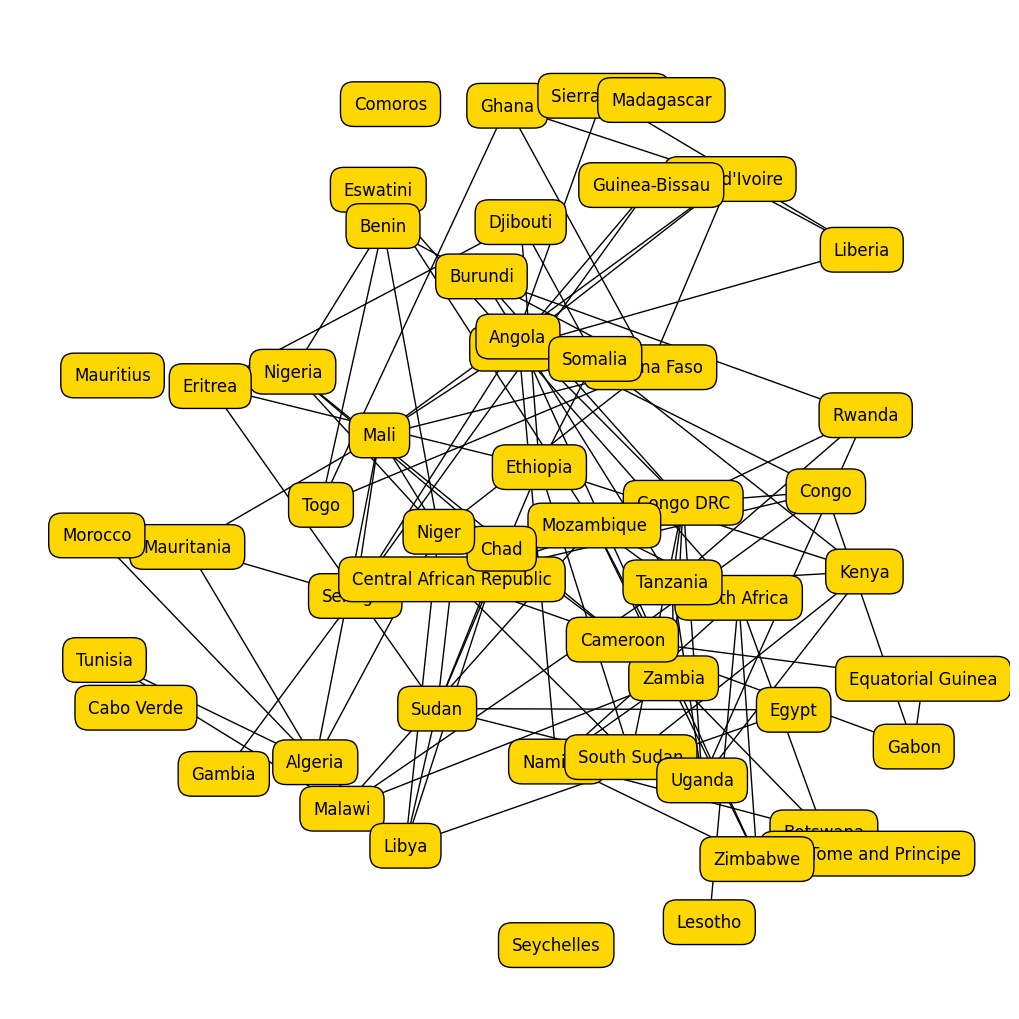

In [ ]:
pos = nx.spring_layout(grafo, k=1)
plt.figure(figsize=(10,10))
nx.draw(grafo, pos=pos, with_labels=True, node_size=600, bbox=dict(facecolor='#ffd700', edgecolor='black', boxstyle='round,pad=0.8'))
plt.show()

# **Coloração do mapa**

### **Ordenação dos países com base na quantidade de vizinhos**

In [ ]:
gdf2 = gdf2.sort_values(by='quantidade_vizinhos', ascending=False).reset_index(drop=True)
gdf2

,pais,vizinhos,quantidade_vizinhos,cor,geometry
0,Congo DRC,"[Angola, Burundi, Congo, Rwanda, Tanzania, Zam...",9,0,"POLYGON ((1792251.955 -653402.315, 1773134.263..."
1,Zambia,"[Angola, Botswana, Congo DRC, Malawi, Mozambiq...",8,0,"POLYGON ((3363297.789 -1687093.287, 3363981.86..."
2,Tanzania,"[Burundi, Congo DRC, Kenya, Malawi, Mozambique...",8,0,"MULTIPOLYGON (((3800042.586 -1070448.252, 3793..."
3,Sudan,"[Central African Republic, Chad, Libya, Egypt,...",7,0,"POLYGON ((3796506.127 1043775.314, 3772524.058..."
4,Niger,"[Burkina Faso, Mali, Algeria, Benin, Chad, Lib...",7,0,"POLYGON ((782360.429 1459248.344, 772804.195 1..."
5,Mali,"[Burkina Faso, Côte d'Ivoire, Guinea, Mauritan...",7,0,"POLYGON ((-1098191.027 1351946.666, -1103392.7..."
6,Burkina Faso,"[Côte d'Ivoire, Ghana, Mali, Benin, Niger, Togo]",6,0,"POLYGON ((102188.311 1231698.57, 90385.321 123..."
7,South Sudan,"[Congo DRC, Kenya, Central African Republic, E...",6,0,"POLYGON ((3796506.127 1043775.314, 3799889.842..."
8,Ethiopia,"[Kenya, Djibouti, Eritrea, South Sudan, Sudan,...",6,0,"POLYGON ((5063856.876 612054.956, 5051062.146 ..."
9,Libya,"[Algeria, Chad, Niger, Tunisia, Egypt, Sudan]",6,0,"POLYGON ((1550678.53 3864288.98, 1553153.813 3..."


### **Atribuição das cores**

In [ ]:
gdf2.loc[0, 'vizinhos'] #Seleciona os países vizinhos

['Angola',
 'Burundi',
 'Congo',
 'Rwanda',
 'Tanzania',
 'Zambia',
 'Central African Republic',
 'South Sudan',
 'Uganda']

In [ ]:
gdf2.loc[gdf2['pais'] == 'Congo DRC', 'cor'].iloc[0] #Seleciona a cor do país vizinho

0

In [ ]:
for i in gdf2.index:
    cores_vizinhos = set()
    vizinhos = gdf2.loc[i, 'vizinhos']
    for vizinho in vizinhos:
        cor_vizinho = gdf2.loc[gdf2['pais'] == vizinho, 'cor'].iloc[0]
        if cor_vizinho != 0:
            cores_vizinhos.add(cor_vizinho)
    cor = 1
    while cor in cores_vizinhos:
        cor += 1
    gdf2.loc[i, 'cor'] = cor

### **Dataframe com as cores atribuídas**

In [ ]:
gdf2

,pais,vizinhos,quantidade_vizinhos,cor,geometry
0,Congo DRC,"[Angola, Burundi, Congo, Rwanda, Tanzania, Zam...",9,1,"POLYGON ((1792251.955 -653402.315, 1773134.263..."
1,Zambia,"[Angola, Botswana, Congo DRC, Malawi, Mozambiq...",8,2,"POLYGON ((3363297.789 -1687093.287, 3363981.86..."
2,Tanzania,"[Burundi, Congo DRC, Kenya, Malawi, Mozambique...",8,3,"MULTIPOLYGON (((3800042.586 -1070448.252, 3793..."
3,Sudan,"[Central African Republic, Chad, Libya, Egypt,...",7,1,"POLYGON ((3796506.127 1043775.314, 3772524.058..."
4,Niger,"[Burkina Faso, Mali, Algeria, Benin, Chad, Lib...",7,1,"POLYGON ((782360.429 1459248.344, 772804.195 1..."
5,Mali,"[Burkina Faso, Côte d'Ivoire, Guinea, Mauritan...",7,2,"POLYGON ((-1098191.027 1351946.666, -1103392.7..."
6,Burkina Faso,"[Côte d'Ivoire, Ghana, Mali, Benin, Niger, Togo]",6,3,"POLYGON ((102188.311 1231698.57, 90385.321 123..."
7,South Sudan,"[Congo DRC, Kenya, Central African Republic, E...",6,2,"POLYGON ((3796506.127 1043775.314, 3799889.842..."
8,Ethiopia,"[Kenya, Djibouti, Eritrea, South Sudan, Sudan,...",6,3,"POLYGON ((5063856.876 612054.956, 5051062.146 ..."
9,Libya,"[Algeria, Chad, Niger, Tunisia, Egypt, Sudan]",6,2,"POLYGON ((1550678.53 3864288.98, 1553153.813 3..."


### **Plotagem do mapa**

<Axes: >

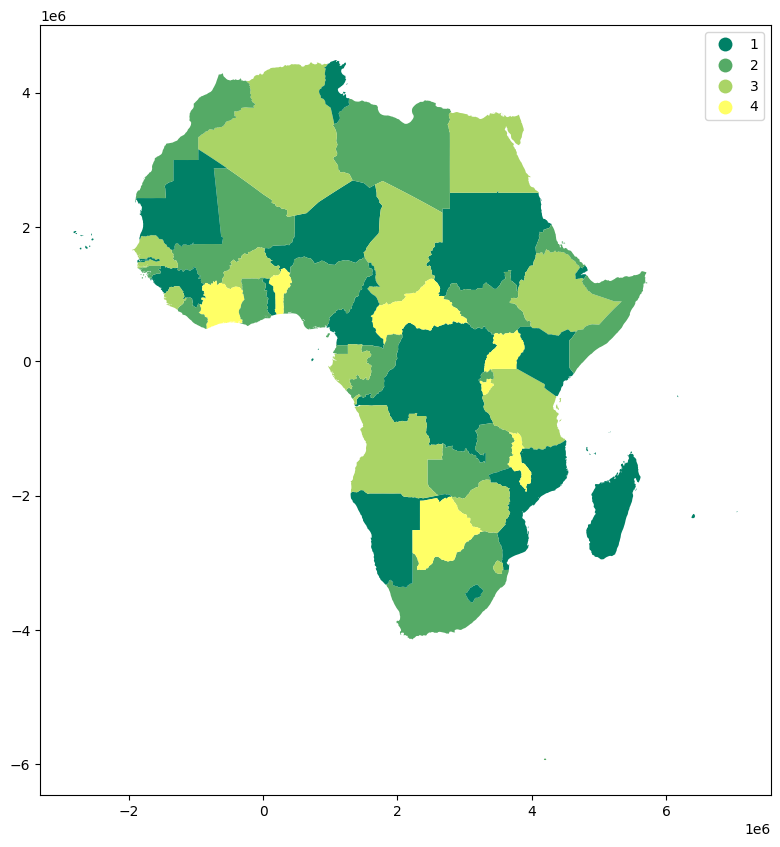

In [ ]:
gdf2.plot(column='cor', cmap='summer', categorical=True, legend=True, figsize=(10,10))

### **Visualização do mapa em modo interativo**

In [ ]:
gdf3 = gdf2.copy().to_crs(epsg=4326)
gdf3.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
mapa = folium.Map(location=[5,10], zoom_start=4, control_scale=True)

geojson = json.loads(gdf3.to_json())

folium.Choropleth(
    geo_data=geojson,
    name="choropleth",
    data=gdf3,
    columns=['pais', 'cor'],
    key_on="feature.properties.pais",
    fill_color='YlGn',
    fill_opacity=0.8,
    line_opacity=0.5,
    legend_name="pais",
    threshold_scale=[1,2,3,4,5]
).add_to(mapa)

highlight = folium.features.GeoJson(
    data=geojson,
    style_function=lambda x: {"fillColor": "transparent",
                              "color": "transparent",
                              "weight": 1},
    highlight_function=lambda x: {"fillColor": "black",
                                  "color": "black",
                                  "fillOpacity": 0.7,
                                  "weight": 1},
    tooltip=folium.GeoJsonTooltip(
        fields=['pais', 'quantidade_vizinhos', 'cor'],
        aliases=['País:', 'Quantidade de vizinhos:', 'Cor: '],
        localize=True)
    )
mapa.add_child(highlight)

search = Search(
  layer=highlight,
  search_label='pais',
  geom_type='Polygon',
  placeholder="Procure por um país"
).add_to(mapa)

mapa
